In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import gymnasium as gym

class QLearningSolver:
    """
    Q-learning algorithm adapted for discrete Gymnasium environments like Taxi-v3.
    """

    def __init__(
        self,
        observation_space: int,
        action_space: int,
        learning_rate: float = 0.1,
        gamma: float = 0.95,
        epsilon: float = 0.1,
        epsilon_decay: float = 0.9999,
        min_epsilon: float = 0.01,
    ):
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.q_table = np.zeros((observation_space, action_space))

    def select_action(self, state: int) -> int:
        """
        Select an action using epsilon-greedy policy.
        """
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.action_space)  # Exploration
        else:
            return np.argmax(self.q_table[state])  # Exploitation

    def update(self, state: int, action: int, reward: float, next_state: int, done: bool) -> None:
        """
        Update Q-value of given state and action.
        """
        max_next_q = 0 if done else np.max(self.q_table[next_state])
        td_error = reward + self.gamma * max_next_q - self.q_table[state, action]
        self.q_table[state, action] += self.learning_rate * td_error

    def decay_epsilon(self):
        """
        Decay epsilon for epsilon-greedy strategy.
        """
        self.epsilon = min(self.min_epsilon, self.epsilon * self.epsilon_decay)

    def __repr__(self):
        return f"QLearningSolver(epsilon={self.epsilon}, q_table_shape={self.q_table.shape})"


#   Training

In [16]:
def train_taxi_qlearning(   episodes: int = 5000,
                            max_steps: int = 100,
                            learning_rate: float = 0.1,
                            gamma: float = 0.99,
                            epsilon: float = 1, 
                            verbose = None
                            ) -> tuple[QLearningSolver, list[float]]:
    """
    Train the QLearningSolver on the Taxi-v3 environment.
    """
    # Initialize the Taxi-v3 environment
    env = gym.make("Taxi-v3", render_mode=None)
    solver = QLearningSolver(
        observation_space=env.observation_space.n,
        action_space=env.action_space.n,
        learning_rate=learning_rate,
        gamma=gamma,
        epsilon=epsilon,
    )

    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0

        for _ in range(max_steps):
            action = solver.select_action(state)
            next_state, reward, done, truncated, _ = env.step(action)
            solver.update(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            if done or truncated:
                break

        solver.decay_epsilon()
        rewards.append(total_reward)

        if verbose and (episode + 1) % verbose == 0:
            avg_reward = np.mean(rewards[-500:])
            print(
                f"Episode {episode + 1}/{episodes}, "
                f"Average Reward (last 500): {avg_reward:.2f}, "
                f"Epsilon: {solver.epsilon:.4f}"
            )

    

    env.close()
    return solver, rewards

# Experiments

Episode 500/50000, Average Reward (last 500): -176.98, Epsilon: 0.0095
Episode 1000/50000, Average Reward (last 500): -27.03, Epsilon: 0.0090
Episode 1500/50000, Average Reward (last 500): 0.81, Epsilon: 0.0086
Episode 2000/50000, Average Reward (last 500): 6.40, Epsilon: 0.0082
Episode 2500/50000, Average Reward (last 500): 7.40, Epsilon: 0.0078
Episode 3000/50000, Average Reward (last 500): 7.34, Epsilon: 0.0074
Episode 3500/50000, Average Reward (last 500): 7.48, Epsilon: 0.0070
Episode 4000/50000, Average Reward (last 500): 7.65, Epsilon: 0.0067
Episode 4500/50000, Average Reward (last 500): 7.61, Epsilon: 0.0064
Episode 5000/50000, Average Reward (last 500): 7.46, Epsilon: 0.0061
Episode 5500/50000, Average Reward (last 500): 7.59, Epsilon: 0.0058
Episode 6000/50000, Average Reward (last 500): 7.86, Epsilon: 0.0055
Episode 6500/50000, Average Reward (last 500): 7.46, Epsilon: 0.0052
Episode 7000/50000, Average Reward (last 500): 7.67, Epsilon: 0.0050
Episode 7500/50000, Average Re

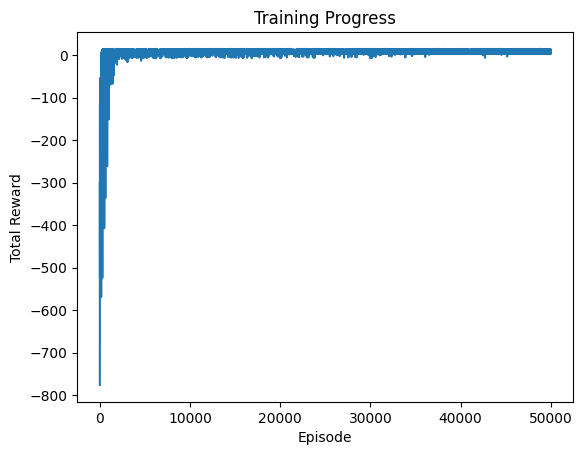

In [17]:
solver, rewards = train_taxi_qlearning(episodes=50000, max_steps=1000, verbose=500)

# Print the learned Q-table
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress")
plt.show()


Best learning rate: 1.0, average reward: 2.1282


Text(0, 0.5, 'Total Reward')

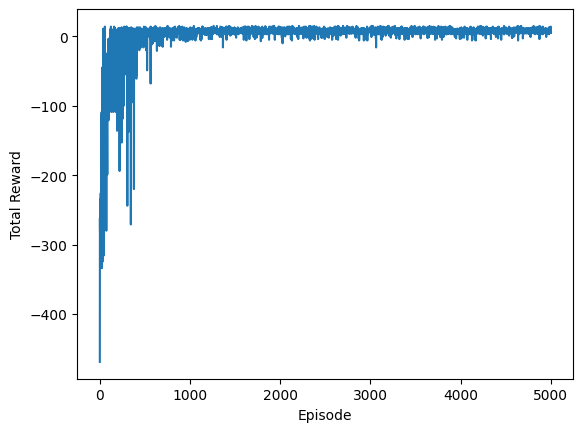

In [18]:
max_reward, iter = 0, 0

for i in range(1, 11):
    solver, rewards = train_taxi_qlearning(episodes=5000, max_steps=100,learning_rate=0.1 * i)
    if np.mean(rewards) > max_reward:
        max_reward = np.mean(rewards)
        iter = i

print(f"Best learning rate: {0.1 * iter}, average reward: {max_reward}")

plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")


Best gamma: 0.6000000000000001, average reward: 2.7008


Text(0, 0.5, 'Total Reward')

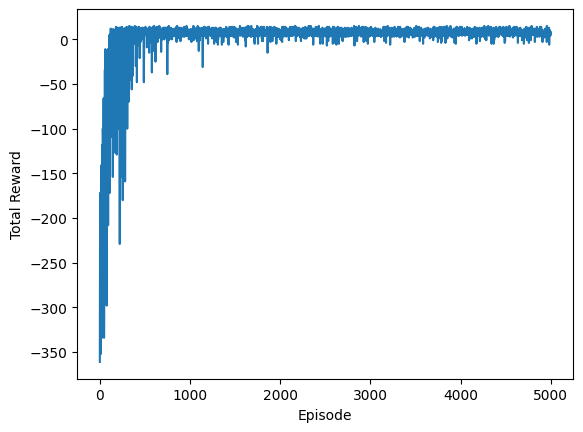

In [19]:
for i in range(1, 11):
    solver, rewards = train_taxi_qlearning(episodes=5000, max_steps=100, gamma=0.1 * i, learning_rate=1)
    if np.mean(rewards) > max_reward:
        max_reward = np.mean(rewards)
        iter = i

print(f"Best gamma: {0.1 * iter}, average reward: {max_reward}")

plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")

Best epsilon: 0.5, average reward: 2.7008


Text(0, 0.5, 'Total Reward')

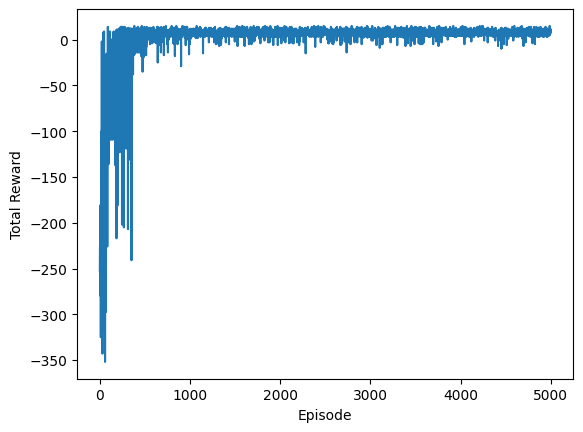

In [20]:
for i in range(1, 6):
    solver, rewards = train_taxi_qlearning(episodes=5000, max_steps=100, epsilon=0.1 * i, learning_rate=1, gamma=1)
    if np.mean(rewards) > max_reward:
        max_reward = np.mean(rewards)
        iter = i

print(f"Best epsilon: {0.1 * i}, average reward: {max_reward}")

plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")

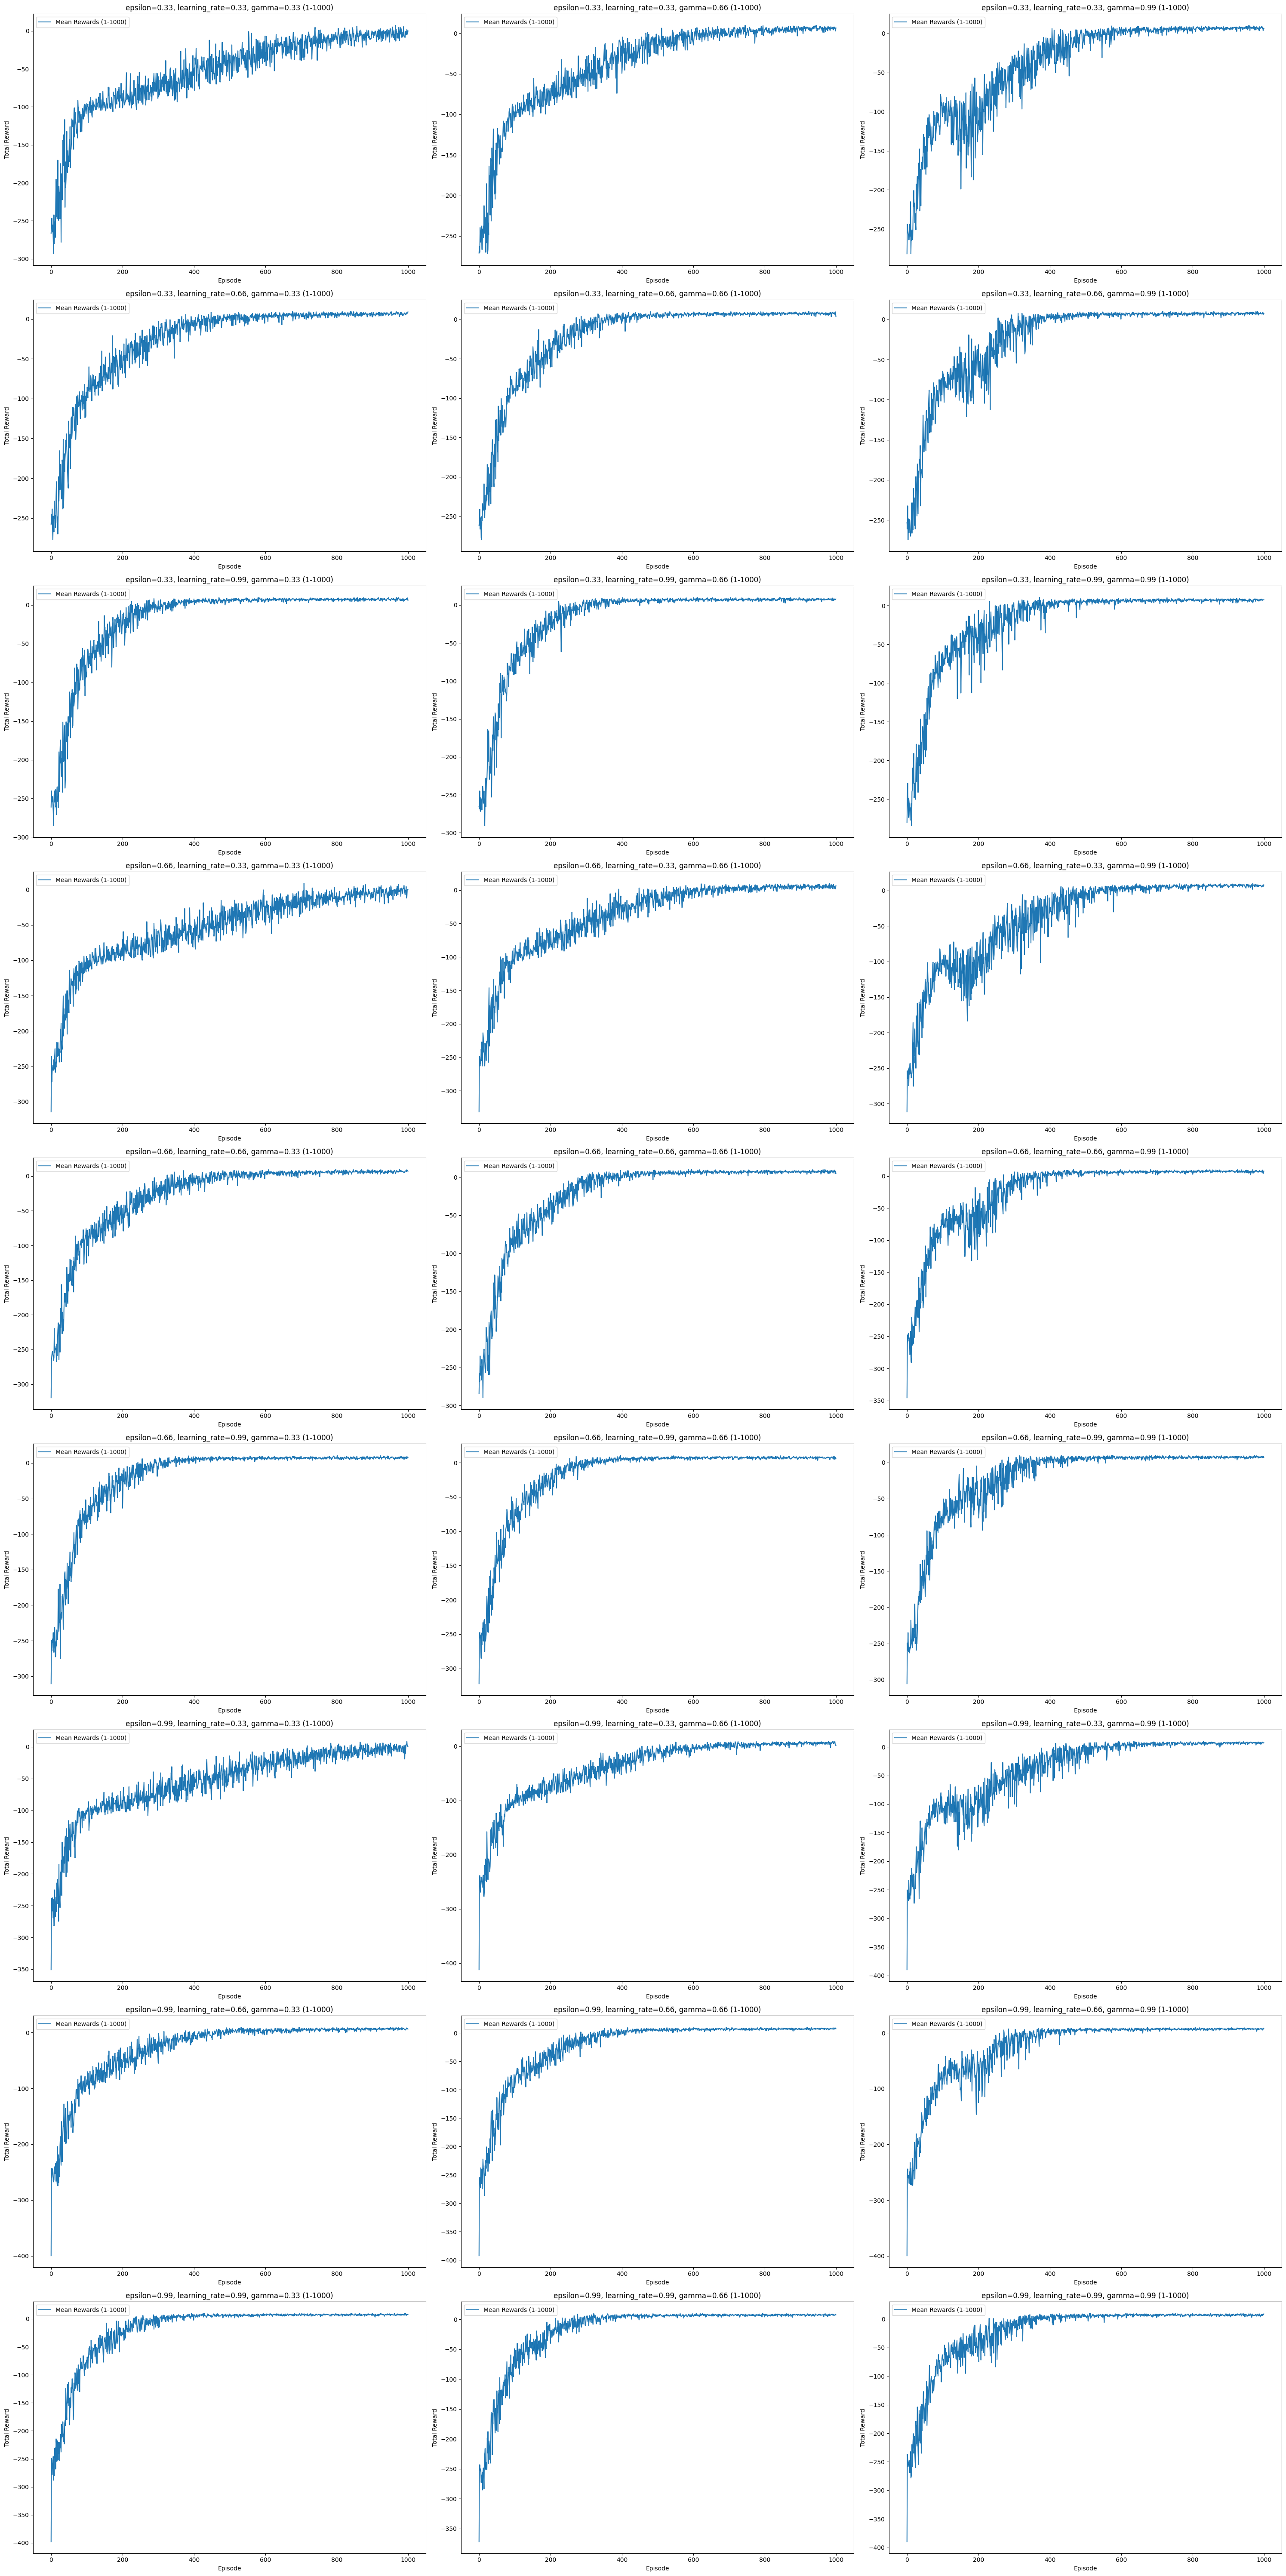

In [23]:
fig, axs = plt.subplots(9, 3, figsize=(30, 60))  # 9 rows, 3 columns
for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            all_rewards = []
            for _ in range(10):
                _, rewards = train_taxi_qlearning(episodes=2500, max_steps=100, epsilon=0.33 * i, learning_rate=0.33 * j, gamma=0.33 * k)
                all_rewards.append(rewards[:1000])
            
            mean_rewards = np.mean(all_rewards, axis=0)
            
            ax1 = axs[(i-1)*3 + (j-1), k-1]
            
            ax1.plot(mean_rewards, label="Mean Rewards (1-1000)")
            ax1.set_xlabel("Episode")
            ax1.set_ylabel("Total Reward")
            ax1.set_title(f"epsilon={0.33 * i}, learning_rate={0.33 * j}, gamma={0.33 * k} (1-1000)")
            ax1.legend()

plt.tight_layout()
plt.show()


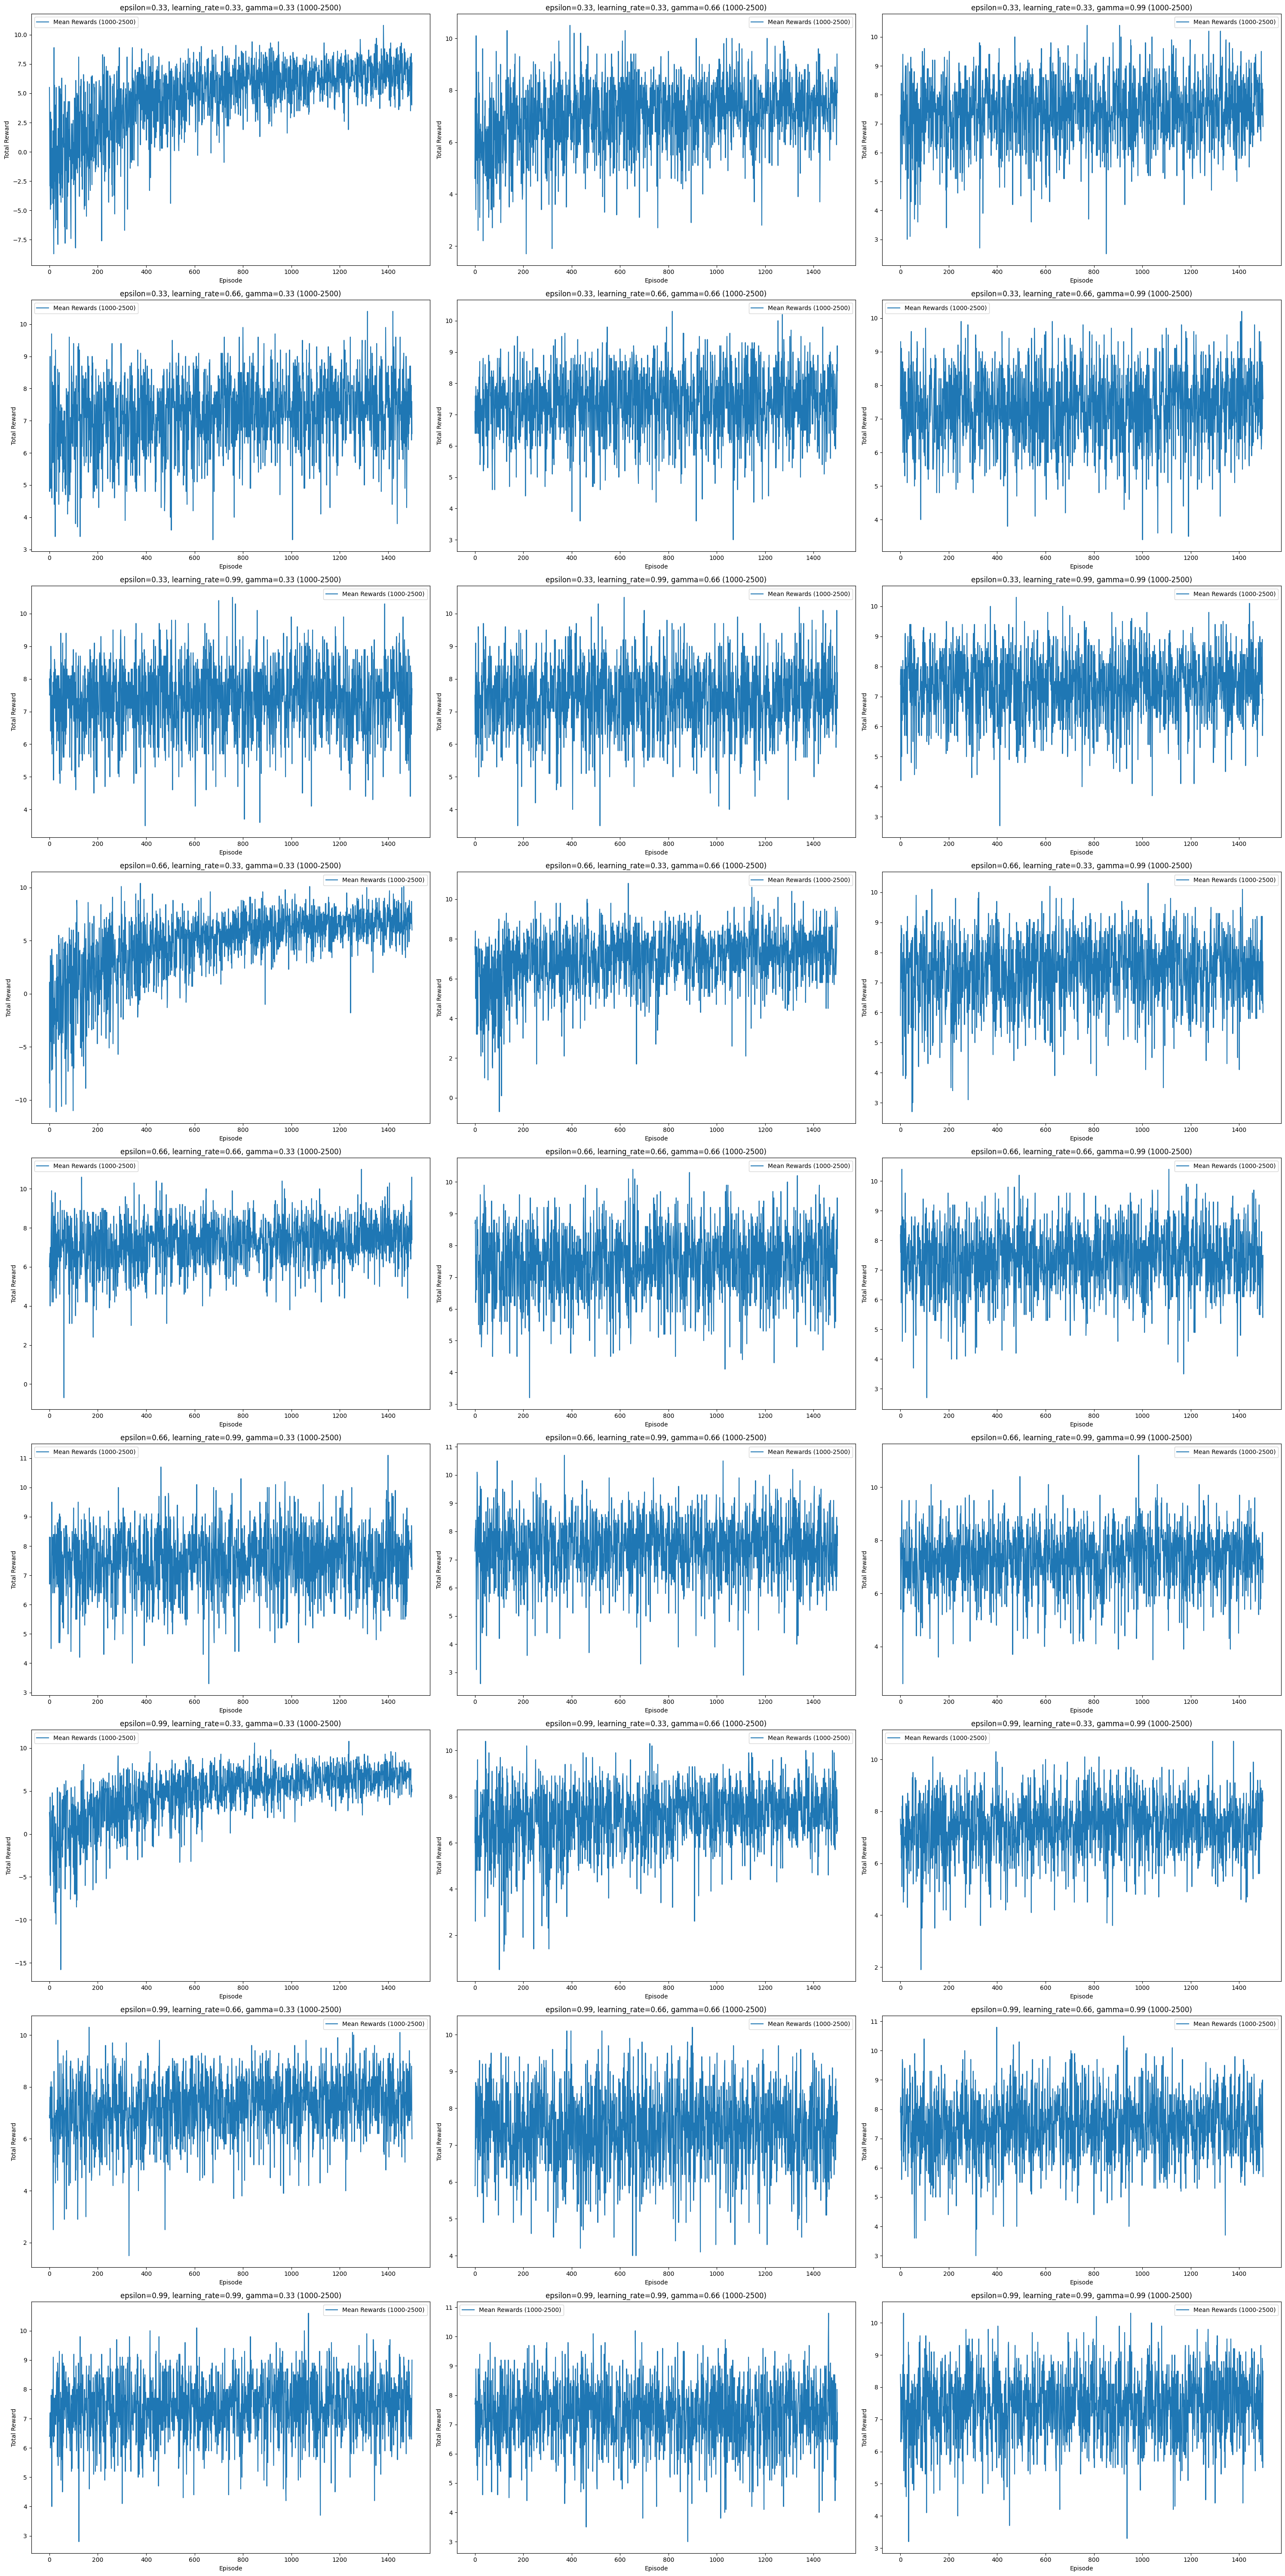

In [24]:
fig, axs = plt.subplots(9, 3, figsize=(30, 60))  # 9 rows, 3 columns
for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            all_rewards = []
            for _ in range(10):
                _, rewards = train_taxi_qlearning(episodes=2500, max_steps=100, epsilon=0.33 * i, learning_rate=0.33 * j, gamma=0.33 * k)
                all_rewards.append(rewards[1000:2500])
            
            mean_rewards = np.mean(all_rewards, axis=0)
            
            ax1 = axs[(i-1)*3 + (j-1), k-1]
            
            ax1.plot(mean_rewards, label="Mean Rewards (1000-2500)")
            ax1.set_xlabel("Episode")
            ax1.set_ylabel("Total Reward")
            ax1.set_title(f"epsilon={0.33 * i}, learning_rate={0.33 * j}, gamma={0.33 * k} (1000-2500)")
            ax1.legend()

plt.tight_layout()
plt.show()

#   Conclusions

-   Higher epsilon means a focus on exploration - more randomness in decision-making, resulting in a more erratic plot.
-   High gamma means a low penalty for taking non-optimal routes - this results in an erratic plot and low performance.
-   The higher the learning rate, the faster the agent trains. This does not have a significant impact on the trained agent, which may be due to the low complexity of the taxi problem.
-   In this case, the best solution seems to be a low epsilon combined with a low gamma - this results in the agent focusing on exploitation quite quickly, while the low gamma ensures that it is penalized for choosing non-optimal paths.

### These conclusions apply only to the taxi problem - for more complex problems with more dimensions, similar parameter settings may yield completely different results.